In [1]:
import random
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import minimize, NonlinearConstraint

import itertools

import scipy.integrate as spi
from scipy.integrate import quad
from scipy.special import erf,erfc
#import cvxpy as cp

from sympy import symbols, solve
from scipy.optimize import fsolve, root
from numpy.polynomial import polynomial as P

PARETO FRONTS

In [2]:
#FOR 2 HORSES
def optWsigma2H(r,p,a):
    
    def J(b,a=a,r=r,p=p):
        log=(np.log(b[0]/r[0]),np.log(b[1]/r[1]))
        log2=((np.log(b[0]/r[0]))**2,(np.log(b[1]/r[1]))**2)
        return -a*np.dot(p,log)+(1-a)*np.sqrt((np.dot(p,log2)-(np.dot(p,log))**2))
              
    def constraint(b):
        return np.sum(b)-1
    
    # Define the bounds as before
    bounds = [(0, 1), (0, 1)]


    # Define the equality constraint dictionary
    constraint_dict_eq = {'type': 'eq', 'fun': constraint}
    
    
    # Minimize the negative of the objective function
    res = minimize(J, [1/2, 1/2], bounds=bounds, constraints=constraint_dict_eq)
    #print(res.x)

    # The maximum value of the original function is the negative of the minimum value found above
    max_value = -res.fun
    
    return res.x

In [3]:
def W_sigma2H(r,p,filename):
    par=np.linspace(0,1,100)
    W=[]
    sigma=[]
    Wnonopt=[]
    sigmanonopt=[]
    for a in par:
        b0,b1=optWsigma2H(r,p,a)
        log=(np.log(b0/r[0]),np.log(b1/r[1]))
        log2=((np.log(b0/r[0]))**2,(np.log(b1/r[1]))**2)
        
        W.append(np.dot(p,log))
        sigma.append(np.sqrt(np.dot(p,log2)-(np.dot(p,log))**2))
        if a==1:
            kellyw=np.dot(p,log)
            kellys=np.sqrt(np.dot(p,log2)-(np.dot(p,log))**2)
    print(kellys)
            
    #print(W)    
    for i in range(100):
        b0=random.uniform(0.001, 1)
        b1=1-b0
       
        if b1!=0:
            log=(np.log(b0/r[0]),np.log(b1/r[1]))
            log2=((np.log(b0/r[0]))**2,(np.log(b1/r[1]))**2)
            if np.sqrt(np.dot(p,log2)-(np.dot(p,log))**2)<0.9139:
                Wnonopt.append(np.dot(p,log))
                sigmanonopt.append(np.sqrt(np.dot(p,log2)-(np.dot(p,log))**2))
    
    Wnonopt=np.array(Wnonopt)
    sigmanonopt=np.array(sigmanonopt)
    #print(Wnonopt)
    #plt.scatter(kellyw,kellys,'y') 
 
    plt.scatter(Wnonopt,sigmanonopt)
    
    plt.plot(W,sigma,'r',linewidth=3)
    plt.scatter([0],[0],color='green',s=200)
    plt.scatter([kellyw],[kellys],color='orange',s=150)
    plt.xlabel('Average Growth Rate')
    plt.xlim(-0.01,1)
    plt.ylabel('Volatility')
    plt.ylim(-0.01,1.25)
    plt.savefig(filename)
    #plt.show()
    return W,sigma
    

/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/2506780555.py:5: RuntimeWarning: divide by zero encountered in log
  log=(np.log(b[0]/r[0]),np.log(b[1]/r[1]))
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/2506780555.py:6: RuntimeWarning: divide by zero encountered in log
  log2=((np.log(b[0]/r[0]))**2,(np.log(b[1]/r[1]))**2)
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/2506780555.py:7: RuntimeWarning: invalid value encountered in scalar multiply
  return -a*np.dot(p,log)+(1-a)*np.sqrt((np.dot(p,log2)-(np.dot(p,log))**2))
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/2506780555.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  return -a*np.dot(p,log)+(1-a)*np.sqrt((np.dot(p,log2)-(np.dot(p,log))**2))


0.9138520775069132


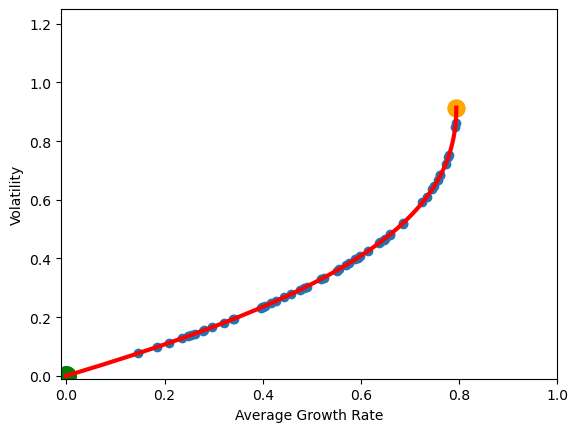

In [4]:
p=(0.1,0.9)
r=(0.7,0.3)
W,sigma=W_sigma2H(r,p,'2horses.pdf')
#plt.scatter(0,0,'g')


In [5]:
#FOR 3 HORSES

def optWsigma(r,p,a):
    
    def J(b,a=a,r=r,p=p):
        log=(np.log(b[0]/r[0]),np.log(b[1]/r[1]),np.log(b[2]/r[2]))
        log2=((np.log(b[0]/r[0]))**2,(np.log(b[1]/r[1]))**2,(np.log(b[2]/r[2]))**2)
        return -a*np.dot(p,log)+(1-a)*np.sqrt((np.dot(p,log2)-(np.dot(p,log))**2))
              
    def constraint(b):
        return np.sum(b)-1
    
    # Define the bounds as before
    bounds = [(0, 1), (0, 1), (0, 1)]


    # Define the equality constraint dictionary
    constraint_dict_eq = {'type': 'eq', 'fun': constraint}
    
    
    # Minimize the negative of the objective function
    res = minimize(J, [1/3, 1/3, 1/3], bounds=bounds, constraints=constraint_dict_eq)
    #print(res.x)

    # The maximum value of the original function is the negative of the minimum value found above
    max_value = -res.fun
    
    return res.x


In [6]:
def W_sigma(r,p,filename):
    par=np.linspace(0,1,100)
    W=[]
    sigma=[]
    Wnonopt=[]
    sigmanonopt=[]
    for a in par:
        b0,b1,b2=optWsigma(r,p,a)
        log=(np.log(b0/r[0]),np.log(b1/r[1]),np.log(b2/r[2]))
        log2=((np.log(b0/r[0]))**2,(np.log(b1/r[1]))**2,(np.log(b2/r[2]))**2)
        W.append(np.dot(p,log))
        sigma.append(np.sqrt(np.dot(p,log2)-(np.dot(p,log))**2))
        
        if a==1:
            kellyw=np.dot(p,log)
            kellys=np.sqrt(np.dot(p,log2)-(np.dot(p,log))**2)
            
    #print(W)    
    for i in range(1000):
        b0=random.uniform(0.1, 1)
        b1=random.uniform(0.1,b0)
        b2=1-b1-b0
        if b2!=0:
            log=(np.log(b0/r[0]),np.log(b1/r[1]),np.log(b2/r[2]))
            log2=((np.log(b0/r[0]))**2,(np.log(b1/r[1]))**2,(np.log(b2/r[2]))**2)
            Wnonopt.append(np.dot(p,log))
            sigmanonopt.append(np.sqrt(np.dot(p,log2)-(np.dot(p,log))**2))
    Wnonopt=np.array(Wnonopt)
    sigmanonopt=np.array(sigmanonopt)
    #print(Wnonopt)
        
    plt.scatter(Wnonopt,sigmanonopt)
    plt.plot(W,sigma,'r',linewidth=3)
    plt.scatter([kellyw],[kellys],color='yellow',s=150)
    plt.scatter([0],[0],color='green',s=300)
    plt.xlabel('Average Growth Rate')
    plt.xlim(-0.01,1)
    plt.ylabel('Volatility')
    plt.ylim(-0.01,1.25)
    plt.savefig(filename)
    #plt.show()
    return W,sigma
    

/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/3769706060.py:6: RuntimeWarning: divide by zero encountered in log
  log=(np.log(b[0]/r[0]),np.log(b[1]/r[1]),np.log(b[2]/r[2]))
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/3769706060.py:7: RuntimeWarning: divide by zero encountered in log
  log2=((np.log(b[0]/r[0]))**2,(np.log(b[1]/r[1]))**2,(np.log(b[2]/r[2]))**2)
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/3769706060.py:8: RuntimeWarning: invalid value encountered in scalar multiply
  return -a*np.dot(p,log)+(1-a)*np.sqrt((np.dot(p,log2)-(np.dot(p,log))**2))
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/3769706060.py:8: RuntimeWarning: invalid value encountered in scalar subtract
  return -a*np.dot(p,log)+(1-a)*np.sqrt((np.dot(p,log2)-(np.dot(p,log))**2))
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/1226896687.py:24: RuntimeWarning: invalid value encountered in log
  log=(np.log(b0/r[0]),n

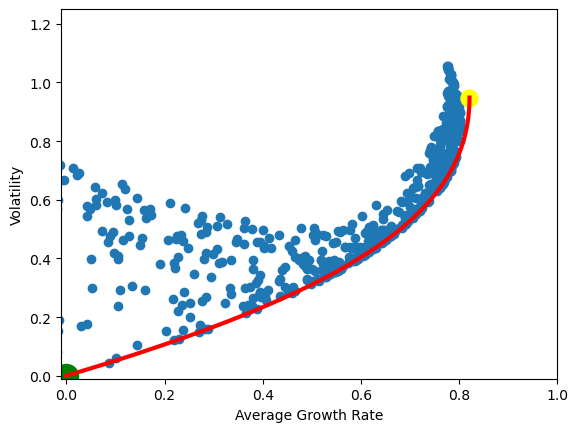

In [7]:
p=(0.1,0.2,0.7)
r=(0.7,0.1,0.2)
W,sigma=W_sigma(r,p,'3horses.pdf')

In [8]:
#Defining the survival probability

def S2(t,B,x0,u,var):
    return 0.5*(1-erf((B-x0-u*t)/(np.sqrt(var*2*t))))-np.exp(-(2*u*(x0-B))/(var))*0.5*(1+erf((B-x0+u*t)/(np.sqrt(var*2*t))))
def S1(t,B,x0,u,var): #just another way to write it
    return 0.5*erfc((B-x0-u*t)/(np.sqrt(var*2*t)))-0.5*np.exp(-(2*u*(x0-B))/(var))*erfc((x0-B-u*t)/(np.sqrt(var*2*t)))

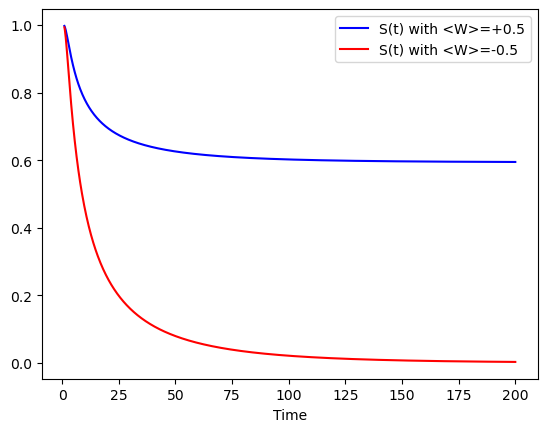

In [9]:
#x0 = 1
#u = 0.1                  #Following calculations, to arrive to 0 I need u=var/(B-x0)=10/(1-10)=around -1
#var = 0.5
#B = 0

x0 = 10.0
u1 = 0.5 #positive drift  
u2=-0.5 #negative drift


#With a positive drift the most probable fisrt passage time is at small times
var = 10
B = 1.0
Sur = []
Sur2=[]
t = np.linspace(1, 200, 1000)

#Fixed B
for times in t:
    Sur.append(S2(times, B, x0, u1, var))
    Sur2.append(S2(times, B, x0, u2, var))

plt.plot(t, Sur, color='blue',label='S(t) with <W>=+0.5')
plt.plot(t, Sur2,color='red',label='S(t) with <W>=-0.5')
plt.xlabel('Time')
plt.legend()
plt.savefig('Surcomp.pdf')
plt.show()

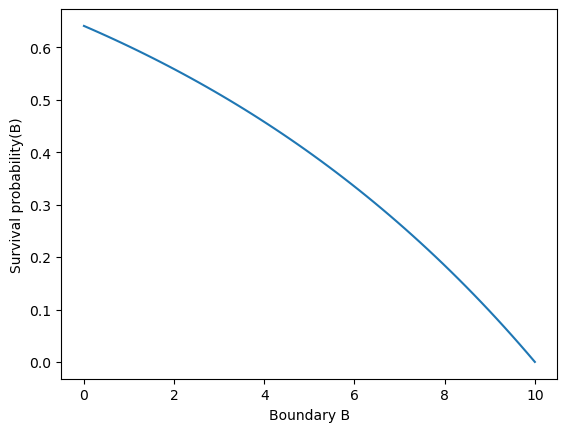

In [10]:
#Fixed t but changing B
t=100
x0 = 10.0
u = 0.5 #positive drift

#With a positive drift the most probable fisrt passage time is at small times
var = 10
B=np.linspace(0,10,60)
Sur=[]
for bounds in B:
    Sur.append(S1(t, bounds, x0, u, var))

plt.plot(B, Sur)
plt.xlabel('Boundary B')
plt.ylabel('Survival probability(B)')
plt.savefig('SurB.pdf')
plt.show()

In [19]:
#Differentiating to obtain the FPT probability, to see which times are more likely to be the time for extinction

def FPT(t,B,x0,u,var):
    integrand = lambda x: p(x, t, B, x0, u, var)
    result, error = quad(integrand, B, np.inf)
    return result


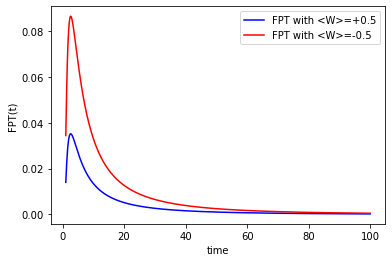

In [20]:
t = np.linspace(1, 100, 1000) #This gives the time to be almost continuous, not discrete

x0 = 10.0
u = 0.5         #With a positive drift the most probable fisrt passage time is at small times
var = 10
B = 1.0
u1=-0.5
Surs = []
Surs2=[]
for time in t:
    Surs.append(S2(time,B,x0,u,var))
    Surs2.append(S2(time,B,x0,u1,var))
    
FPTs = -np.diff(Surs)/np.diff(t)
t_FPTs = (t[1:] + t[:-1])/2
FPTs2 = -np.diff(Surs2)/np.diff(t)



plt.plot(t_FPTs, FPTs,color='blue',label='FPT with <W>=+0.5')
plt.plot(t_FPTs, FPTs2,color='red',label='FPT with <W>=-0.5')

plt.xlabel('time')
plt.ylabel('FPT(t)')
plt.legend()
plt.savefig('fptcomp.pdf')


plt.show()

#As Luis' Plot for FPT

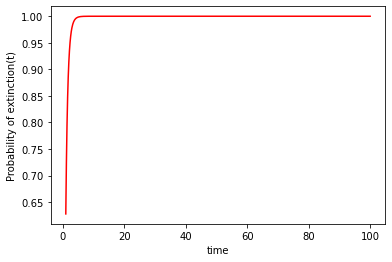

In [21]:
#Studying the P_ext instead of Survival probability
x0 = 1
u = -1                  #Following calculations, to arrive to 0 I need u=var/(B-x0)=10/(1-10)=around -1
var = 0.5
B = 0                    #if you set u=-1 instead, the Pext goes to 1 at later times, obviously
Pext=[]
for times in t:
    Pext.append(1-S2(times, B, x0, u, var))

plt.plot(t, Pext,'r')
plt.xlabel('time')
plt.ylabel('Probability of extinction(t)')
plt.savefig('Pext.pdf')
plt.show()


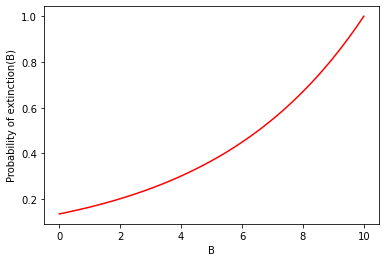

In [22]:
t=100

x0 = 10.0
u = 1 #positive drift 


#With a positive drift the most probable fisrt passage time is at small times
var = 10
B=np.linspace(0,10,60)
Pext=[]
for bounds in B:
    Pext.append(1-S2(t, bounds, x0, u, var))

plt.plot(B, Pext,'r')
plt.xlabel('B')
plt.ylabel('Probability of extinction(B)')
plt.savefig('PextB.pdf')
plt.show()

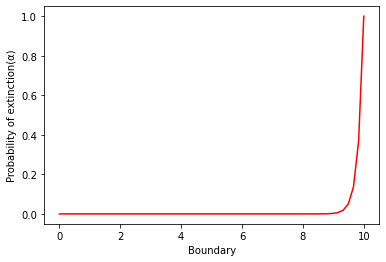

In [23]:
#Pext wrt B implementing Kelly

#Fixed t
t=100
x0=10
p=(0.7,0.3)            #This fixes the Kelly's model for 2 horses, we compute Pext folowing the model of GBM but with Kelly's parameter
r=(0.4,0.6)
b=(0.5,0.5)

u=p[0]*np.log(b[0]/r[0])+p[1]*np.log(b[1]/r[1])
var=p[0]*(np.log(b[0]/r[0]))**2+p[1]*(np.log(b[1]/r[1]))**2-u**2

B=np.linspace(0,10,60)
P_ext1=[]
for bounds in B:
    P_ext1.append(1-S2(t, bounds, x0, u, var))

plt.plot(B, P_ext1,'r')
plt.xlabel('Boundary')
plt.ylabel('Probability of extinction(α)')
plt.savefig('pextB.pdf')
plt.show()


#WRT DIFFERENT B's

In [11]:
#Now let's instead compute the probability of going below a certain treshold B, making an empirical statistics on runs of 100 bets
#How often is the log-cap going beyond B, statistically speaking? We try this for different B's to compare it with the GBM result:

N=100 #number of bets (time)
c=10 #initial capital
K=100 #Number of simulations to average on

def Pext(t,x0,B,u,var,K):
    
    logc=[]
    flag=0
    choices=list(range(len(p)))

    for k in range(K):
        c=x0
        f=0
        for i in range(t-1):     #In 100 runs, do I reach my bound B?
                win=random.choices(choices,weights=p)
                c+=np.log(b[win[0]]/r[win[0]]) #diagonal odds
                if c<=B:
                    f=1
                    flag+=1
                if f==1:
                    break
    
    
                logc.append(c)
    

    return flag/K
 

In [25]:
t=100
K=100
p=(0.7,0.3)
P_ext=[]
B=np.linspace(0,10,60)

for bounds in B:
    P_ext.append(Pext(t,x0,bounds,u,var,K))

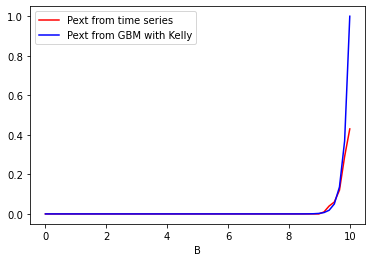

In [26]:
plt.plot(B,P_ext,c='r',label='Pext from time series')
plt.plot(B,P_ext1,c='b', label='Pext from GBM with Kelly')
plt.xlabel('B')


plt.legend()
plt.show()

In [27]:
#As expected, even though for the small variance is difficult to reach backruptcy, when the boundary is close to x0=10 the probablity
#gets very high, both for the analitical computation and for the empirical discrete P_ext

<W>=0.020410997260127586
Var(W)=0.041100488473291355


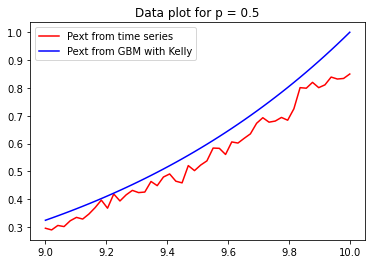

<W>=0.06095750807094401
Var(W)=0.039456468934359695


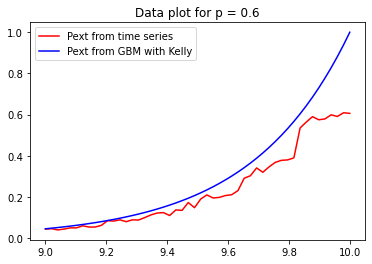

<W>=0.10150401888176043
Var(W)=0.034524410317564744


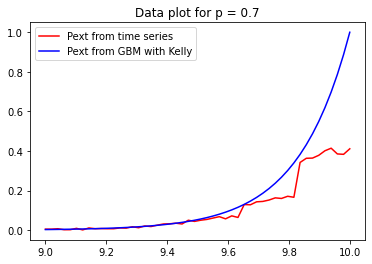

<W>=0.14205052969257692
Var(W)=0.02630431262290646


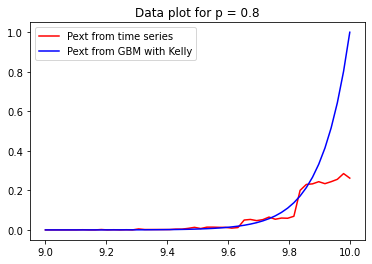

<W>=0.18259704050339334
Var(W)=0.014796175850384882


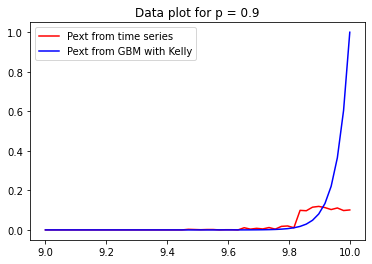

In [28]:
#What if we try with different values of p,1-p?

prob=np.linspace(0.5,0.9,5)
           #This fixes the Kelly's model for 2 horses, we compute Pext folowing the model of GBM but with Kelly's parameter
r=(0.4,0.6)
b=(0.5,0.5)
x0=10
for ps in prob:
    p=(ps,1-ps)
    t=100
    K=1000 #more simulations to average on
    P_ext=[]
    P_ext1=[]
    B=np.linspace(9,10,50)
    
    u=p[0]*np.log(b[0]/r[0])+p[1]*np.log(b[1]/r[1])
    var=p[0]*(np.log(b[0]/r[0]))**2+p[1]*(np.log(b[1]/r[1]))**2-u**2

    
    for bounds in B:
        P_ext.append(Pext(t,x0,bounds,u,var,K))
        P_ext1.append(1-S2(t, bounds, x0, u, var))
    print('<W>={}'.format(u))
    print('Var(W)={}'.format(var))
    fig, ax = plt.subplots()
    ax.plot(B,P_ext,c='r',label='Pext from time series')
    ax.plot(B,P_ext1, c='b',label='Pext from GBM with Kelly')
    ax.set_title("Data plot for p = {}".format(ps))   #p is the value of ps in p=(ps,1-ps)
    ax.legend()
    plt.show()

<W>=-0.39889840465642734
Var(W)=0.20202546494834359


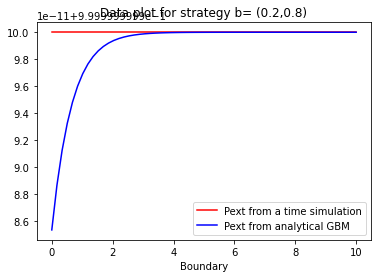

<W>=-0.15513224676806925
Var(W)=0.0409953980071589


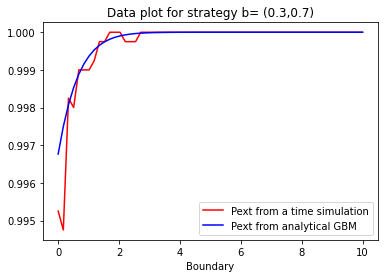

<ipython-input-16-73552b656af5>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return 0.5*(1-erf((B-x0-u*t)/(np.sqrt(var*2*t))))-np.exp(-(2*u*(x0-B))/(var))*0.5*(1+erf((B-x0+u*t)/(np.sqrt(var*2*t))))
<ipython-input-16-73552b656af5>:4: RuntimeWarning: invalid value encountered in double_scalars
  return 0.5*(1-erf((B-x0-u*t)/(np.sqrt(var*2*t))))-np.exp(-(2*u*(x0-B))/(var))*0.5*(1+erf((B-x0+u*t)/(np.sqrt(var*2*t))))


<W>=0.0
Var(W)=0.0


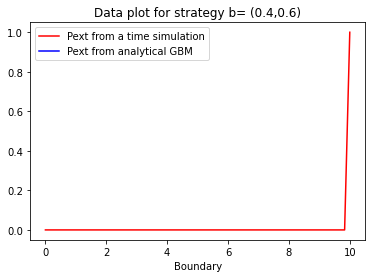

KeyboardInterrupt: 

In [29]:
#Having p fixed instead, let's try to change strategy
t=100
x0=10
p=(0.7,0.3)
r=(0.4,0.6)

strategy=(0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)
for bs in strategy:
    b=(bs,1-bs)
    t=100
    K=4000
    P_ext=[]
    P_ext1=[]
    B=np.linspace(0,10,60)
    
    u=p[0]*np.log(b[0]/r[0])+p[1]*np.log(b[1]/r[1])
    var=p[0]*(np.log(b[0]/r[0]))**2+p[1]*(np.log(b[1]/r[1]))**2-u**2

    
    for bounds in B:
        P_ext.append(Pext(t,x0,bounds,u,var,K))
        P_ext1.append(1-S2(t, bounds, x0, u, var))
    print('<W>={}'.format(u))
    print('Var(W)={}'.format(var))
    bs1=round(1-bs,1)
    fig, ax = plt.subplots()
    ax.plot(B,P_ext, label="Pext from a time simulation",c='r')
    ax.plot(B,P_ext1, label="Pext from analytical GBM",c='b')
    plt.xlabel('Boundary')
    ax.set_title("Data plot for strategy b= ({},{})".format(bs,bs1))   
    ax.legend()
    plt.savefig('sim_{}.pdf'.format(bs))
    plt.show()

In [ ]:
#As we can see, the highest growth rate is reached for kelly' s strategy b1=p1=0.7, but having and higher variance gives an higher P_ext!

In [ ]:
#Just trying with 2 horses and different parameters

t=100
x0=0
p=(0.7,0.3)
r=(0.4,0.6)
b=(0.5,0.5)
    
K=1000
P_ext=[]
P_ext1=[]
B=np.linspace(-0.5,0,100)
    
u=p[0]*np.log(b[0]/r[0])+p[1]*np.log(b[1]/r[1])
var=p[0]*(np.log(b[0]/r[0]))**2+p[1]*(np.log(b[1]/r[1]))**2-u**2

    
for bounds in B:
    P_ext.append(Pext(t,x0,bounds,u,var,K))
    P_ext1.append(1-S2(t, bounds, x0, u, var))
print(u)
print(var)

plt.plot(B,P_ext1,label="Pext from analytical GBM",c='b')
plt.plot(B,P_ext,label="Pext from a time simulation",c='r')
plt.legend()
plt.show()

#The plot looks similar to Luis' one since the parameters are similar, but still K=1000, whereas Luis' one had K=4000, so more averaged

In [ ]:
#Try with Luis Dinis' parameters to see how the plots look similar

t=100
K=4000
x0=0
p=(0.4,0.6)
r=(0.4347,0.5)
B=np.linspace(-0.5,0,50)
b=p #Kelly's case

P_ext=[]
P_ext1=[]
    
u=p[0]*np.log(b[0]/r[0])+p[1]*np.log(b[1]/r[1])
var=p[0]*(np.log(b[0]/r[0]))**2+p[1]*(np.log(b[1]/r[1]))**2-u**2

    
for bounds in B:
    P_ext.append(Pext(t,x0,bounds,u,var,K))
    P_ext1.append(1-S2(t, bounds, x0, u, var))
print(u)
print(var)

plt.plot(B,P_ext1,c='b',label='Pext analytical')
plt.scatter(B,P_ext,label='Pext time series',facecolors='none', edgecolors='r')
plt.plot(B,P_ext,'r',linewidth=0.5)
plt.plot
plt.xlabel('B')
plt.legend()
plt.savefig('dinis.pdf')
plt.show()


In [ ]:
#Exactly as Luis' results

In [ ]:
#Let's try now with 3 horses using Kelly's strategy

t=100
x0=10
p=(0.7,0.2,0.1)  
r=(0.4,0.2,0.4)
b=p #I am fixing Kelly's strategy

t=100
K=100
P_ext=[]
P_ext1=[]
B=np.linspace(0,10,60)

u=p[0]*np.log(b[0]/r[0])+p[1]*np.log(b[1]/r[1])+p[2]*np.log(b[2]/r[2])
var=p[0]*(np.log(b[0]/r[0]))**2+p[1]*(np.log(b[1]/r[1]))**2+p[2]*(np.log(b[2]/r[2]))**2-u**2


for bounds in B:
        P_ext.append(Pext(t,x0,bounds,u,var,K))
        P_ext1.append(1-S2(t, bounds, x0, u, var))

plt.plot(B,P_ext,c='r',label='Pext from time series')
plt.plot(B,P_ext1,c='b', label='Pext from GBM with Kelly')
plt.xlabel('B')


plt.legend()
plt.show()

In [ ]:
            #Using always Kelly's strategy but with different values for p's, always in the 3 horses case

            '''t=100
            x0=10
            p=(0.7,0.2,0.1)
            r=(0.4,0.2,0.4)
            b=p #Kelly's strategy'''

            r=(0.4,0.2,0.4)
            prob=(0.5,0.3,0.2)
            ps1=0.5
            ps2=0.3

            p=prob
            b=p                        #Fixing Kelly's strategy, as Luis did
            t=100
            K=4000
            P_ext=[]
            P_ext1=[]
            B=np.linspace(0,10,60)

            u=p[0]*np.log(b[0]/r[0])+p[1]*np.log(b[1]/r[1])+p[2]*np.log(b[2]/r[2])
            var=p[0]*(np.log(b[0]/r[0]))**2+p[1]*(np.log(b[1]/r[1]))**2+p[2]*(np.log(b[2]/r[2]))**2-u**2


            for bounds in B:
                P_ext.append(Pext(t,x0,bounds,u,var,K))
                P_ext1.append(1-S2(t, bounds, x0, u, var))
            print(u)
            print(var)
            ps1=round(ps1,1)
            ps2=round(ps2,1)
            ps3=round(1-ps1-ps2,1)
            fig, ax = plt.subplots()
            ax.plot(B,P_ext, label="Pext from a time simulation",c='r')
            ax.plot(B,P_ext1, label="Pext from analytical GBM",c='b')
            plt.xlabel('Boundary')
            ax.set_title("Data plot for p = ({},{},{})".format(ps1,ps2,ps3))   #p is the value of ps in p=(ps,1-ps)
            ax.legend()
            plt.savefig('sim3_{},{}.pdf'.format(ps1,ps2))
            plt.show()
            
            

In [ ]:
#using Kelly's strategy, let's try, always with two horses, to see how Pext depends on the variance/volatility:

t=100
K=100
u=1

x0=10
B=0

P_ext1=[]


v=np.linspace(1,100,60)
for var in v:
    
    P_ext1.append(1-S2(t, B, x0, u, var))
    
    

plt.plot(np.sqrt(v),P_ext1,c='b', label='Pext from GBM')
plt.xlabel('σw')


plt.legend()
plt.show()

In [ ]:
#What will happen if, as definition of risk, we take into account only the negative fluctuations, which should be more proportional to P_ext?
#(ALL THIS PART I' M TOTALLY NOT SURE ABOUT IT, IT WAS JUST INTERESTING TO CHECK ANY PROPORTIONALITY)

In [ ]:
# Probability distribution
p = np.array([0.7, 0.3])

# Possible outcomes
b = np.array([0.5, 0.5])
o = np.array([2.5, 1.66667])

# Compute the expected value of log(b*o)
mu = np.dot(p, np.log(b*o))

# Compute the variance of log(X) taking into account only the positive fluctuations
neg_fluctuations = np.maximum(-np.log(b*o) + mu, 0)
var_positive = np.dot(p, neg_fluctuations**2)-(np.dot(p, np.maximum(np.log(b*o) - mu, 0)))**2
var = np.var(np.log(b*o), axis=0)

print("Negative std:", np.sqrt(var_positive))
print("std:",np.sqrt(var))

In [ ]:
#Now, using different strategies b's, let's see how var and neg_var are related

p = np.array([0.7, 0.3])
o = np.array([2.5, 1.66667])
strategy=np.linspace(0.5,0.9,100)
negvar=[]
variances=[]
P_ext1=[]
t=100
K=100
x0=0
B=-0.5
for bs in strategy:
    b=(bs,1-bs)
    mu = np.dot(p, np.log(b*o))
    neg_fluctuations = np.maximum(-np.log(b*o) + mu, 0)
    var_neg = np.dot(p, neg_fluctuations**2)-(np.dot(p, np.maximum(np.log(b*o) - mu, 0)))**2
    var = np.var(np.log(b*o), axis=0)
    negvar.append((var_neg))
    variances.append((var))
    
    P_ext1.append(1-S2(t, B, x0, mu, var))
    
    

plt.plot(np.sqrt(variances),np.sqrt(negvar),c='b', label='Positive σw')
plt.xlabel('σw')
plt.plot(np.sqrt(variances),P_ext1,c='r', label='P_ext')

plt.legend()
plt.show()

In [ ]:
#Since there's a linear correlation between the std and the negative std, we can arrive to the relation between P_ext and neg-std

def linear_regression(x, y):
    n = len(x)
    slope = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - np.sum(x)**2)
    intercept = (np.sum(y) - slope * np.sum(x)) / n
    return slope, intercept

slope, intercept = linear_regression(np.array(variances), np.array(negvar))
print(slope)
print(intercept)

In [ ]:
#So to obtain P_ext wrt to negative fluctuations one would pass 0.4116*var instead of var in S2 such that:

#Now, using different strategies b's, let's see how P_ext and neg_var are related

p = np.array([0.7, 0.3])
o = np.array([2.5, 1.66667])
strategy=np.linspace(0.5,0.9,100)
negvar=[]
variances=[]
P_ext1=[]
Pext_var=[]
t=100
K=100
x0=0
B=-0.5
for bs in strategy:
    b=(bs,1-bs)
    mu = np.dot(p, np.log(b*o))
    neg_fluctuations = np.maximum(-np.log(b*o) + mu, 0)
    var_neg = np.dot(p, neg_fluctuations**2)-(np.dot(p, np.maximum(np.log(b*o) - mu, 0)))**2
    var = np.var(np.log(b*o), axis=0)
    negvar.append((var_neg))
    variances.append((var))
    
    P_ext1.append(1-S2(t, B, x0, mu, 0.4116*var))
    Pext_var.append(1-S2(t, B, x0, mu, var))
    
variances=np.array(variances)*0.4116   
plt.plot(P_ext1, np.sqrt(negvar),c='b', label='neg-σw')
plt.xlabel('P_ext')
plt.plot(Pext_var, np.sqrt(variances),c='r', label='σw')

plt.legend()
plt.show()

FROM NOW ON, WE' LL WORK WITH THE FRAMEWORK OF RISK-CONSTRAINED KELLY'S PAPER

In [ ]:
#Let's try to plot many trajectories for a single defined alpha
#Since from literature alpha=0.7 and lambda=5.5, then beta=0.141 so for an alpha of 0.7 I want a u and var that satisfies this value to copy
#a bit the plots on literature

In [13]:
#Let's put the bound alpha to be =0.78 so that the probability of extinction is somehow similar to the one in literature

t=50  #number of bets (time)
K=10 
x0=0
c=0 #initial capital
alpha=-0.5
time=np.linspace(0,t,t)
 
def trajs(p,r,alpha,t,K,x0):
    
    b=p #Kelly's
    time=np.linspace(0,t,t)
    choices=list(range(len(p)))
    
    plt.title('non-constrained trajectories for B={}'.format(alpha))

    for k in range(K):
        logc=[]
        c=x0
        logc.append(c)
        tim2=[0]
        reach=False
        for i in time[:(len(time)-1)]:     #In 100 runs, do I reach my bound B?
            win=random.choices(choices,weights=p)
            
            tim2.append(i)
            c+=np.log(b[win[0]]/r[win[0]]) #diagonal odds 
            logc.append(c)
            
            if c<=alpha:
                reach=True
              #  break
        
        if reach==False:
            plt.plot(tim2,logc,'b')
        else:
            plt.plot(tim2,logc,color='green')
        plt.xlabel('time')
        
        plt.ylabel('log-capital')
    plt.plot(time,alpha*np.ones(t),'r',label='α',linestyle='dashed')
    plt.savefig('traj_{}.pdf'.format(alpha))
    plt.legend()
    plt.show()



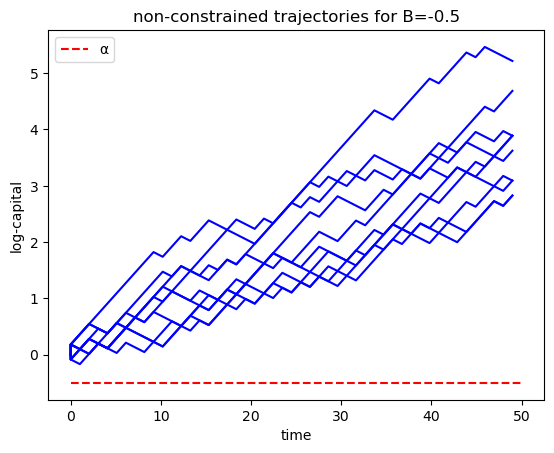

In [14]:
p=(0.4,0.6)
r=(0.4347,0.5)
alpha=-0.5
trajs(p,r,alpha,t,K,x0)

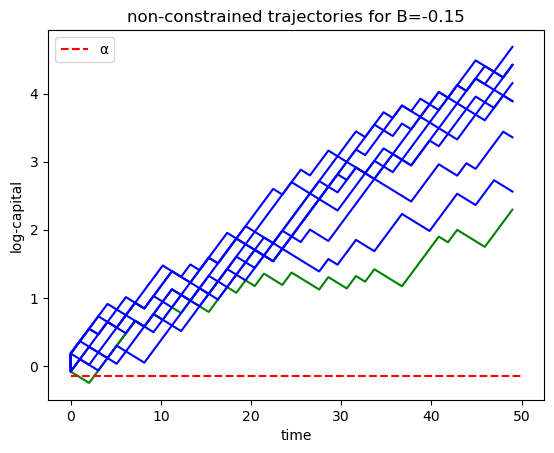

In [15]:
p=(0.4,0.6)
r=(0.4347,0.5)
alpha=-0.15
trajs(p,r,alpha,t,K,x0)

In [ ]:
p=(0.4,0.6)
r=(0.4347,0.5)
alpha=-0.05
trajs(p,r,alpha,t,K,x0)

In [ ]:
p=(0.5,0.5)
r=(0.4,0.6)
trajs(p,r,alpha,t,K,x0)

In [ ]:
p=(0.5,0.5)
r=(0.3,0.7)
trajs(p,r,alpha,t,K,x0)

In [ ]:
p=(0.5,0.5)
r=(0.2,0.8)
trajs(p,r,alpha,t,K,x0)

In [ ]:
p=(0.5,0.5)
r=(0.1,0.9)
trajs(p,r,alpha,t,K,x0)

In [ ]:
p=(0.5,0.5)
r=(0.00000001,1)
trajs(p,r,alpha,t,K,x0)

In [ ]:
p=(0,1)
r=(0.4,0.6)
trajs(p,r,alpha,t,K,x0)

USING EXTINCTION PROBABILITY AS RISK WITH 3 HORSES

In [16]:
def maxim(r,p,beta,alpha):
    
    def Delta(b,r=r,p=p):
        log=(np.log(b[0]/r[0]),np.log(b[1]/r[1]),np.log(b[2]/r[2]))
        return -np.dot(p,log)

    lamb=np.log(beta)/np.log(alpha)
    
    def constraint1(b,r=r,p=p,lamb=lamb):
        return (p[0]*(b[0]/r[0])**(-lamb)+p[1]*(b[1]/r[1])**(-lamb)+p[2]*(b[2]/r[2])**(-lamb))-1
    
    def constraint2(b):
        return np.sum(b)-1
    
    nonlinear_constraint = NonlinearConstraint(constraint1, lb=float('-inf'), ub=0)
    
    # Define the bounds as before
    bounds = [(0, 1), (0, 1), (0, 1)]

    #constraint_dict_ineq = {'type': 'ineq', 'fun': constraint1}

    # Define the equality constraint dictionary
    constraint_dict_eq = {'type': 'eq', 'fun': constraint2}
    
    
    # Minimize the negative of the objective function
    res = minimize(Delta, [1/3, 1/3, 1/3], bounds=bounds, constraints=[nonlinear_constraint, constraint_dict_eq])
    #print(res.x)
    
    log=(np.log(res.x[0]/r[0]),np.log(res.x[1]/r[1]),np.log(res.x[2]/r[2]))
    log2=((np.log(res.x[0]/r[0]))**2,(np.log(res.x[1]/r[1]))**2,(np.log(res.x[2]/r[2]))**2)
    sigma=(np.sqrt(np.dot(p,log2)-(np.dot(p,log))**2))
    # The maximum value of the original function is the negative of the minimum value found above
    max_value = -res.fun
    
    return max_value,sigma

In [ ]:
#Now I want to make lambda vary such that, having a bound fixed as alpha=0.5 and starting from 1, the probability of extinction moves between 0 and 1, changing beta

THIS WILL PLOT THE MAXIMIZING STRATEGIES WITH P_EXT CONSTRAINT FOR DIFFERENT VALUED OF BETA (P_EXT)

In [17]:
def E_Pext(r,p,alpha):
    
    r=np.array(r)
    p=np.array(p)
    betas=np.linspace(0.001,1,100)
    wealth=[]
    sigma=[]
    
    for beta in betas:
        optwealth,sigmax=maxim(r,p,beta,alpha)
        wealth.append(optwealth)
        sigma.append(sigmax)
        #print(wealth)
    #print(wealth[-1])
        if beta==1:
            kw,ks=maxim(r,p,beta,alpha)
            
    
    plt.plot(wealth,sigma,'g',label='Pareto front for mean-extinction trade-off')

    
    plt.xlabel('<W>')
    #plt.xlim(0,0.20)
    plt.ylabel('Volatility')
    #plt.ylim(0,0.0001)
    plt.legend()
    plt.savefig('pareto_tradeoff.pdf')
    plt.show()
    
    line,=plt.plot(kw*np.ones(len(betas)),betas,c='g', label="Kelly's <W>",linestyle='dashed')
    line.set_color('black')
    plt.plot(wealth,betas,'g',label='Pext for mean-extinction trade-off')
    plt.xlabel('<W>')
    #plt.xlim(0,0.20)
    plt.ylabel('Pext')
    #plt.ylim(0,0.0001)
    plt.legend()
    #plt.show()
    
    #plt.plot(sigma,betas,'b',label='Pext for mean-extinction trade-off')
    #plt.xlabel('σW ')
    #plt.xlim(0,0.20)
    #plt.ylabel('Pext')
    #plt.ylim(0,0.0001)
    
    return sigma,betas,ks   

/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/2503227586.py:4: RuntimeWarning: divide by zero encountered in log
  log=(np.log(b[0]/r[0]),np.log(b[1]/r[1]),np.log(b[2]/r[2]))
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/2503227586.py:10: RuntimeWarning: divide by zero encountered in scalar power
  return (p[0]*(b[0]/r[0])**(-lamb)+p[1]*(b[1]/r[1])**(-lamb)+p[2]*(b[2]/r[2])**(-lamb))-1


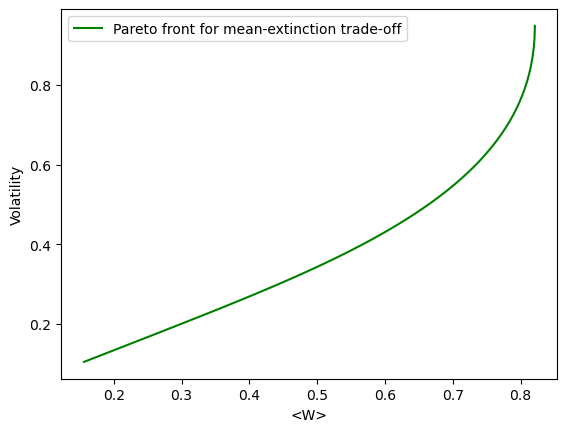

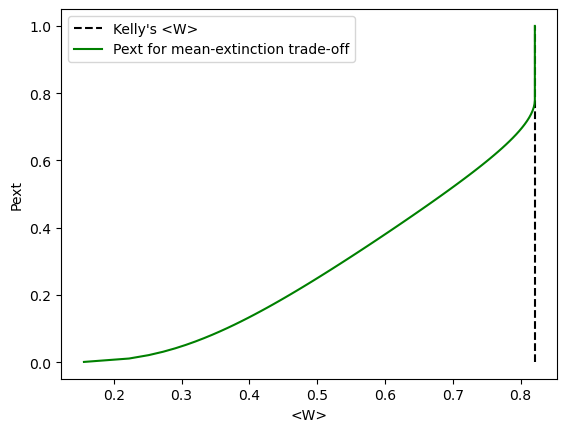

In [18]:
#p=(0.1,0.8,0.1)
#r=(0.4,0.2,0.4)

p=(0.1,0.2,0.7)
r=(0.7,0.1,0.2)

E_Pext(r,p,0.78)
plt.show()

In [ ]:
#What it looks from the plot is that if I have a small probability to be extincted I can't guarantee myself to have a big wealth,
#since if I don't "risk" I can't be able to gain, more considerations in report and presentation

DOING THE MAXIMIZATION OF W WITH THE CONSTRAINT OF P_EXT BUT USING KKT CONDITIONS

In [19]:
def maximKKT(r,p,beta,alpha):
    
    lamb=np.log(beta)/np.log(alpha)
    
    #case without constraint:
    
    check=(p[0]*(p[0]/r[0])**(-lamb)+p[1]*(p[1]/r[1])**(-lamb)+p[2]*(p[2]/r[2])**(-lamb))
    
    if check < 1:
        #print('kelly with beta',beta)
        return p[0],p[1],p[2] #kelly's strategy satisfies the problem
    
    #case with constraint:
    
    def equations(vars):
        b0, b1, b2, k, u = vars
        eq1 = p[0]/b0*(1+k*lamb*(b0/r[0])**(-lamb))+u
        eq2 = p[1]/b1*(1+k*lamb*(b1/r[1])**(-lamb))+u
        eq3 = p[2]/b2*(1+k*lamb*(b2/r[2])**(-lamb))+u
        eq4 = b0+b1+b2-1
        eq5=(p[0]*(b0/r[0])**(-lamb)+p[1]*(b1/r[1])**(-lamb)+p[2]*(b2/r[2])**(-lamb))-1
        return [eq1, eq2, eq3, eq4, eq5]
    initial_guess = [0.1, 0.2, 0.7, 0.0756, -1]  # Initial guess for the solution (you have to vary yourself the initial guess for the lagr multiplier)
    solution = fsolve(equations, initial_guess)
    #print(solution,beta)
    
    if solution[0]>0 and solution[1]>0 and solution[2]>0 and solution[3]>0:
        #print(solution[0],solution[1],solution[2], 'with beta', beta)
        
        return solution[0],solution[1],solution[2]
    

In [20]:
def E_Pext_KKT(r,p,alpha):
    
    r=np.array(r)
    p=np.array(p)
    betas=np.linspace(0.002,1,100)
    wealth=[]
    sigma=[]
    
    for beta in betas:
        b0,b1,b2=maximKKT(r,p,beta,alpha)
        log=(np.log(b0/r[0]),np.log(b1/r[1]),np.log(b2/r[2]))
        log2=((np.log(b0/r[0]))**2,(np.log(b1/r[1]))**2,(np.log(b2/r[2]))**2)
        optwealth= np.dot(p,log)
        optsigma= (np.sqrt(np.dot(p,log2)-(np.dot(p,log))**2))
        wealth.append(optwealth)
        sigma.append(optsigma)
        #print(wealth)
    #print(wealth[-1])
    
    plt.plot(wealth,sigma,'g',label='Pareto front for risk-constrained with KKT')
    plt.xlabel('Wealth')
    plt.xlim(0.4,0.85)
    plt.ylabel('volatility')
    #plt.ylim(0,0.0001)
    plt.legend()
    plt.show()
    
    plt.plot(wealth,betas,'b',label='Pext for risk-constrained with KKT')
    plt.xlabel('Wealth')
    plt.xlim(0.4,0.85)
    plt.ylabel('P_ext')
    #plt.ylim(0,0.0001)
    plt.legend()
    plt.show()

using KKT minimization


/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/372196054.py:18: RuntimeWarning: invalid value encountered in scalar power
  eq2 = p[1]/b1*(1+k*lamb*(b1/r[1])**(-lamb))+u
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/372196054.py:21: RuntimeWarning: invalid value encountered in scalar power
  eq5=(p[0]*(b0/r[0])**(-lamb)+p[1]*(b1/r[1])**(-lamb)+p[2]*(b2/r[2])**(-lamb))-1
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/372196054.py:19: RuntimeWarning: invalid value encountered in scalar power
  eq3 = p[2]/b2*(1+k*lamb*(b2/r[2])**(-lamb))+u
/Users/dlacoste/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


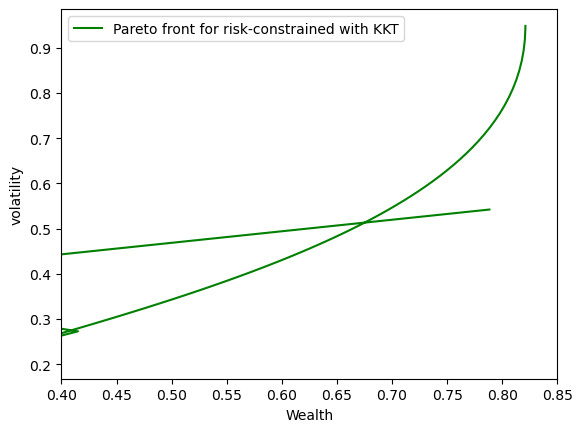

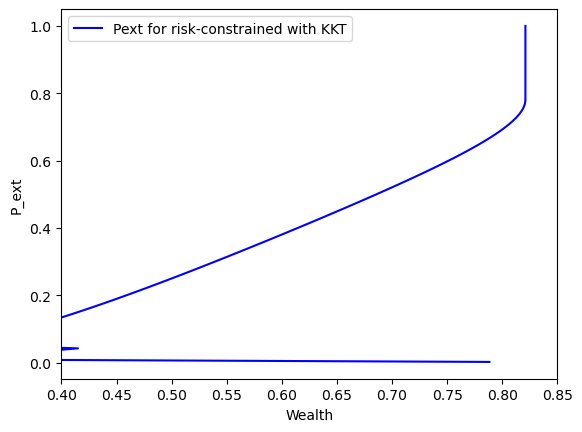

using preimplemented minimization


/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/2503227586.py:4: RuntimeWarning: divide by zero encountered in log
  log=(np.log(b[0]/r[0]),np.log(b[1]/r[1]),np.log(b[2]/r[2]))
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/2503227586.py:10: RuntimeWarning: divide by zero encountered in scalar power
  return (p[0]*(b[0]/r[0])**(-lamb)+p[1]*(b[1]/r[1])**(-lamb)+p[2]*(b[2]/r[2])**(-lamb))-1


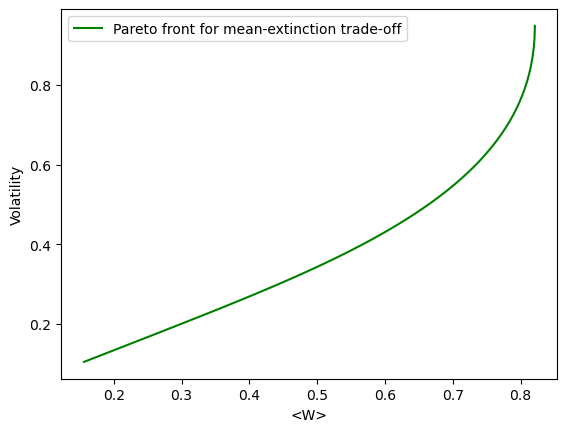

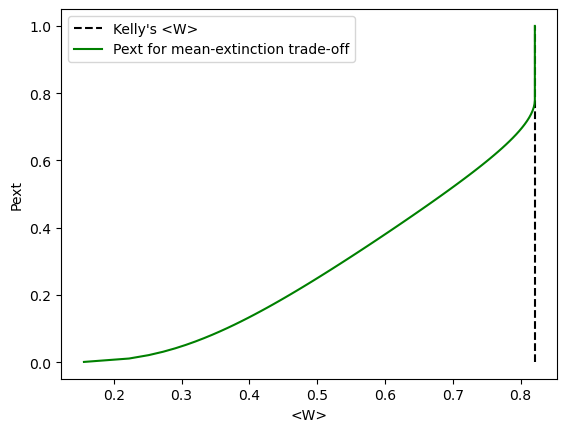

In [21]:
p=(0.1,0.2,0.7)
r=(0.7,0.1,0.2)
alpha=0.78
print('using KKT minimization')
E_Pext_KKT(r,p,alpha)
print('using preimplemented minimization')
E_Pext(r,p,alpha)
plt.show()

#As expected, when beta goes to 1 (P_ext) the best strategy is Kelly's one, hence the wealth is computed as the Kelly's one.
#Let's compare this plot with the theoretical extinction probability one obtains theoretically with the optimal b's obtained by the VARIANCE-W
#trade-off, indeed let's find the optimal values to create the pareto front for 3 horses, so with the method we've always used:

In [ ]:
#THE KKT MAXIMIZATION IS SHOWN AFTER W=0.4 BECAUSE BEFORE THERE'S TOO MUCH DEPENDENCE ON THE INITIAL VALUE OF THE LAGRANGE MULTIPLIER, SO THE RESULTS ARE NOT AS GOOD AS 'minimize' FUNCTION

COMPARING THE VOLATILITY AS RISK WRT EXTINCTION AS RISK FOR THE GRAPH W-P_ext

<ipython-input-13-6f04ffe35217>:6: RuntimeWarning: divide by zero encountered in log
  log=(np.log(b[0]/r[0]),np.log(b[1]/r[1]),np.log(b[2]/r[2]))
<ipython-input-13-6f04ffe35217>:7: RuntimeWarning: divide by zero encountered in log
  log2=((np.log(b[0]/r[0]))**2,(np.log(b[1]/r[1]))**2,(np.log(b[2]/r[2]))**2)
<ipython-input-13-6f04ffe35217>:8: RuntimeWarning: invalid value encountered in double_scalars
  return -a*np.dot(p,log)+(1-a)*np.sqrt((np.dot(p,log2)-(np.dot(p,log))**2))
<ipython-input-14-2e726d4689d8>:24: RuntimeWarning: invalid value encountered in log
  log=(np.log(b0/r[0]),np.log(b1/r[1]),np.log(b2/r[2]))
<ipython-input-14-2e726d4689d8>:25: RuntimeWarning: invalid value encountered in log
  log2=((np.log(b0/r[0]))**2,(np.log(b1/r[1]))**2,(np.log(b2/r[2]))**2)


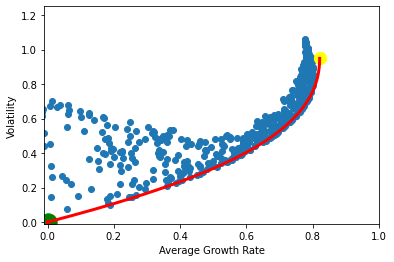

In [38]:
#This cell is useful to obtain W, sigma otpimized with the first method with p and r given, so than in the other cells they will be used to
#inside 1-S2(W,sigma) to compute the P_ext from the first method
p=(0.1,0.2,0.7)
r=(0.7,0.1,0.2)
W,sigma=W_sigma(r,p,'3horses')

/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/1715920252.py:4: RuntimeWarning: overflow encountered in exp
  return 0.5*(1-erf((B-x0-u*t)/(np.sqrt(var*2*t))))-np.exp(-(2*u*(x0-B))/(var))*0.5*(1+erf((B-x0+u*t)/(np.sqrt(var*2*t))))
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/1715920252.py:4: RuntimeWarning: invalid value encountered in scalar multiply
  return 0.5*(1-erf((B-x0-u*t)/(np.sqrt(var*2*t))))-np.exp(-(2*u*(x0-B))/(var))*0.5*(1+erf((B-x0+u*t)/(np.sqrt(var*2*t))))
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/2503227586.py:4: RuntimeWarning: divide by zero encountered in log
  log=(np.log(b[0]/r[0]),np.log(b[1]/r[1]),np.log(b[2]/r[2]))
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/2503227586.py:10: RuntimeWarning: divide by zero encountered in scalar power
  return (p[0]*(b[0]/r[0])**(-lamb)+p[1]*(b[1]/r[1])**(-lamb)+p[2]*(b[2]/r[2])**(-lamb))-1


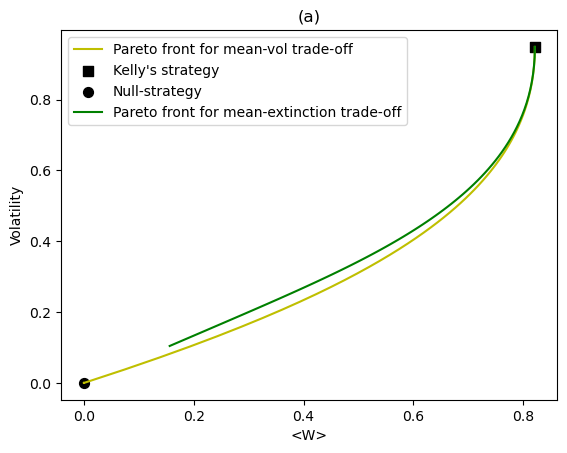

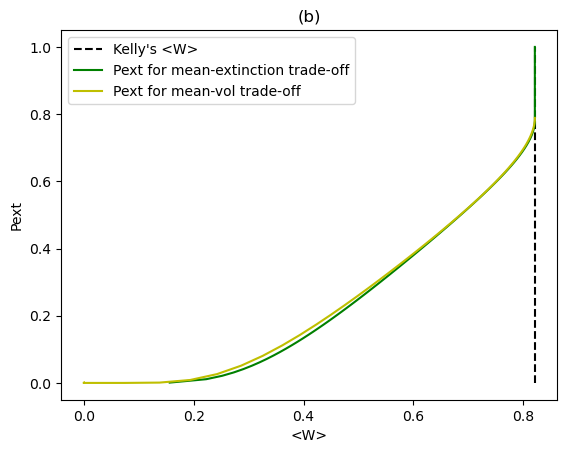

/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/1715920252.py:4: RuntimeWarning: overflow encountered in exp
  return 0.5*(1-erf((B-x0-u*t)/(np.sqrt(var*2*t))))-np.exp(-(2*u*(x0-B))/(var))*0.5*(1+erf((B-x0+u*t)/(np.sqrt(var*2*t))))
/var/folders/nj/8_y549ys3w95k2y8dz3k68_m0000gn/T/ipykernel_32352/1715920252.py:4: RuntimeWarning: invalid value encountered in scalar multiply
  return 0.5*(1-erf((B-x0-u*t)/(np.sqrt(var*2*t))))-np.exp(-(2*u*(x0-B))/(var))*0.5*(1+erf((B-x0+u*t)/(np.sqrt(var*2*t))))


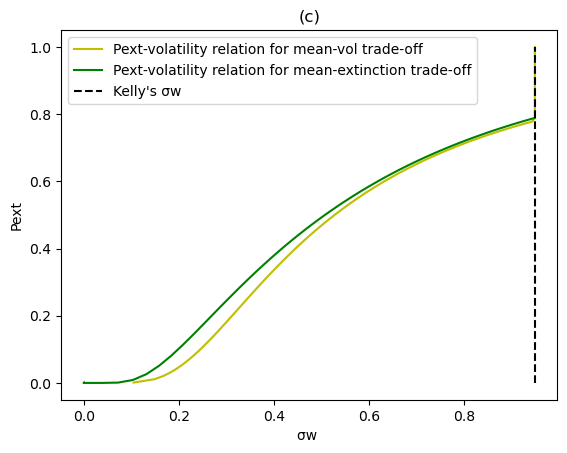

In [22]:
p=(0.1,0.2,0.7)
r=(0.7,0.1,0.2)
x0=1
t=100
alpha=0.78      #for an alpha of 0.9 to mimic the result one needs x0-B= 0.06 so B= 0.94
                    #for an aplha of 0.78 to mimic the result one needs x0-B= 0.13 so B= 0.87
                     #for an alpha of 0.5 to mimic one needs x0-B= 0.38 so B= 0.62
             #for an alpha of 0.3 to mimic one need x0-B= 0.66 so B= 0.34
                     #for an alpha of 0.1 to mimic one needs x0-B almost 1 so B=0
    
B=0.87

kellyw=np.max(W)
kellys=np.max(sigma)

P_ext=np.ones(len(W))
for i in range(len(W)):
    u=W[i]
    var=(sigma[i])**2
    P_ext[i]=1-S2(t,B,x0,u,var)

plt.plot(W,sigma,'y',label='Pareto front for mean-vol trade-off')
plt.scatter([kellyw],[kellys],color='black',s=50,marker='s',label="Kelly's strategy")
plt.scatter([0],[0],color='black',s=50,label='Null-strategy')
plt.title('(a)')
plt.legend()
#plt.savefig('Pareto.pdf')
sigma1,betas,ks=E_Pext(r,p,alpha)


B=round(B,2)
plt.plot(W,P_ext,'y',label='Pext for mean-vol trade-off')
plt.title('(b)')
plt.legend()
plt.savefig('Pext_tradeoff_{}.pdf'.format(B))
plt.show()


plt.plot(sigma1,betas,color='y',label='Pext-volatility relation for mean-vol trade-off')

plt.savefig('Ps1.pdf')

for i in range(len(W)):
    u=W[i]
    var=(sigma[i])**2
    P_ext[i]=1-S2(t,B,x0,u,var)

plt.plot(sigma,P_ext,color='g',label='Pext-volatility relation for mean-extinction trade-off')
line,=plt.plot(ks*np.ones(len(betas)),betas,c='g', label="Kelly's σw",linestyle='dashed')
line.set_color('black')
plt.title('(c)')
plt.xlabel('σw ')
#plt.xlim(0,0.20)
plt.ylabel('Pext')
plt.legend()
plt.savefig('Ps.pdf')


STUDY OF THE PHASE TRANSITION AT BETA=BETA* FOR WHICH WE HAVE KELLY, WHY DO WE HAVE THAT VERTICAL FLEX (i.e. ALWAYS KELLY FOR ALL VALUES OF BETA>BETA*?

In [ ]:
def fun(r,p,lamb): #constraint on the KKT conditions to be at Kelly, for 3 horses and a fixed value of beta (lambda)
    return p[0]**(1-lamb)*r[0]**(lamb)+p[1]**(1-lamb)*r[1]**(lamb)+p[2]**(1-lamb)*r[2]**(lamb)

In [ ]:
#checking that for those value of lambda<lambda* (beta>beta*), the KKT condition is satisfied

lambd=np.linspace(2,0,1000000)
const=[]
p=(0.1,0.2,0.7)
r=(0.7,0.1,0.2)
beta=[]
for lamb in lambd:
    const.append(fun(r,p,lamb))
    beta.append(0.78**(lamb))
plt.plot(beta,const)
plt.xlabel('β')

plt.ylabel( 'E' )
plt.plot(beta,np.ones(len(beta)),linestyle='dashed',color='black')
plt.plot(0.78*np.ones(len(np.linspace(0,1,100))),np.linspace(0,1,100),linestyle='dashed',color='red',label='β*')
plt.legend()
plt.savefig('th.pdf')
    

In [ ]:
#More generally, we can see that, under certain conditions, the constraint is satisfied no matter the value of lambda

#Unfair case, but particularly for each ri>pi, as obtained from the calculation, I should lose the phase transition now

p=(0.1,0.2,0.7)
r=(0.7,0.2,0.8)

E_Pext(r,p,0.78)
plt.savefig('kk.pdf')

In [ ]:
#Since the odds here are always against the environment Kelly is reached only when lamb=0, beta=1, so no more vertical flex.
#if instead the odds are always lower than the environment (ri<pi whatever i), then Kelly should always be selected:

#Superfair case, but particularly for each ri<pi

p=(0.1,0.2,0.7)
r=(0.1,0.1,0.6)

E_Pext(r,p,0.78)
plt.savefig('kkk.pdf')

In [ ]:
#Exactly as expected, Kelly is always selected for whatever P_ext! Let's try with different cases:

p=(0.33,0.33,0.33)
r=(0.4,0.3,0.3)

E_Pext(r,p,0.78)
plt.show()

In [ ]:
#Kelly is selected even before!

p=(0.1,0.45,0.45)
r=(0.9,0.05,0.05)

E_Pext(r,p,0.78)
plt.show()

In [ ]:
p=(0.33,0.33,0.33)
r=(0.2,0.6,0.1)

E_Pext(r,p,0.78)
plt.show()

CONSTRUCTING AN OBJECTIVE FUNCTION WITH EXTINCTION PROBABILITY INSTEAD OF VOLATILITY

In [ ]:
#Constructing directly an objective function with parameter a that gives a trade-off between W and P_ext
def optWPext(r,p,a,x0,alpha,t):
    
    def J(b,a=a,r=r,p=p,x0=x0,alpha=alpha,t=t):
        log=(np.log(b[0]/r[0]),np.log(b[1]/r[1]),np.log(b[2]/r[2]))
        log2=((np.log(b[0]/r[0]))**2,(np.log(b[1]/r[1]))**2,(np.log(b[2]/r[2]))**2)
        W=np.dot(p,log)
        sigma=np.sqrt(np.dot(p,log2)-(np.dot(p,log))**2)
        erfc1=erfc((alpha-x0-W*t)/(sigma*np.sqrt(2*t)))
        erfc2=erfc((-alpha+x0-W*t)/(sigma*np.sqrt(2*t)))
        exp=np.exp((-2*W*(x0-alpha))/sigma**2)
        return -a*(W+1)+1-(1-a)/2*(erfc1-exp*erfc2)
              
    def constraint(b):
        return np.sum(b)-1
    
    # Define the bounds as before
    bounds = [(0, 1), (0, 1), (0, 1)]


    # Define the equality constraint dictionary
    constraint_dict_eq = {'type': 'eq', 'fun': constraint}
    
    
    # Minimize the negative of the objective function
    res = minimize(J, [1/3, 1/3, 1/3], bounds=bounds, constraints=constraint_dict_eq)
    #print(res.x)

    # The maximum value of the original function is the negative of the minimum value found above
    max_value = -res.fun
    
    return res.x



In [ ]:
def W_Pext(r,p,x0,alpha,t):
    par=np.linspace(0,1,100)
    W=[]
    sigma=[]
    Wnonopt=[]
    sigmanonopt=[]
    for a in par:
        b0,b1,b2=optWPext(r,p,a,x0,alpha,t)
        log=(np.log(b0/r[0]),np.log(b1/r[1]),np.log(b2/r[2]))
        log2=((np.log(b0/r[0]))**2,(np.log(b1/r[1]))**2,(np.log(b2/r[2]))**2)
        W.append(np.dot(p,log))
        sigma.append(np.sqrt(np.dot(p,log2)-(np.dot(p,log))**2))
    #print(W)    
    for i in range(1000):
        b0=random.uniform(0.1, 1)
        b1=random.uniform(0.1,b0)
        b2=1-b1-b0
        if b2!=0:
            log=(np.log(b0/r[0]),np.log(b1/r[1]),np.log(b2/r[2]))
            log2=((np.log(b0/r[0]))**2,(np.log(b1/r[1]))**2,(np.log(b2/r[2]))**2)
            Wnonopt.append(np.dot(p,log))
            sigmanonopt.append(np.sqrt(np.dot(p,log2)-(np.dot(p,log))**2))
    Wnonopt=np.array(Wnonopt)
    sigmanonopt=np.array(sigmanonopt)
    #print(Wnonopt)
        
    plt.scatter(Wnonopt,sigmanonopt)
    plt.plot(W,sigma,'g',label='Pareto front for mean-Pext trade-off')
    plt.xlabel('<W>')
    plt.xlim(0,1)
    plt.ylabel('volatility')
    plt.ylim(0,2)
    plt.legend()
    #plt.show()
    return W,sigma

COMPARING DEFINITION OF RISK AS VOLATILITY WITH EXTINCTION AS RISK BUT USING AN OBJECTIVE FUNCTION

In [ ]:
x0=1
alpha=0.78
t=100
p=(0.1,0.2,0.7)
r=(0.7,0.1,0.2)
plfig, ax = plt.subplots()  # Crea una nuova figura e assi

# Plot del primo grafico
W_sigma(r,p,'3horsescomp1')

# Plot del secondo grafico
Wnew,sigmanew=W_Pext(r,p,x0,alpha,t)

plt.show()


In [ ]:
x0=1
t=100
B=alpha                       #analyzed just in the case in which the two definitions of extinction threshold are the same
P_ext=np.ones(len(Wnew))
for i in range(len(Wnew)):
    u=Wnew[i]
    var=(sigmanew[i])**2
    P_ext[i]=1-S2(t,B,x0,u,var)
plt.plot(Wnew,sigmanew,label='Pareto front for mean-ext objective function')
E_Pext(r,p,alpha)
plt.plot(W,P_ext,label='Pext for mean-extinction objective function')
plt.legend()


CONFRONTO CON DIVERSI r,p,P_ext (beta) TRA LE TRAIETTORIE NEL TEMPO NEL CASO NON-CONSTRAINT E NEL CASO CONSTRAINT

In [ ]:
#Since now I have a way to constrain the trajectories to have a certain probability of extinction, let's plot some trajs for a number of runs:
def trajs_con(r,p,alpha,beta,x0,time):
                               #these 2 define lambda
    W,sigma=maxim(r,p,beta,alpha) 
    
    
    #I obtain the values of W and sigma that respect the constraint, now I can give it to a GBM simulation:
    #etapdf=np.random.normal(size=1)
    x=np.zeros((10, time))
    times=np.linspace(1,time,time)
    
    bound=alpha*np.ones(time)
    
    plt.title('Constrained trajectories for P_ext < {}'.format(beta))
    for k in range(10):
        x[k][0]=x0
        reach=False
        for t in range(int(time)):
            eta=np.random.normal(size=1)
            if t<time-1:
                x[k][t+1]=x[k][t]+W+sigma*eta
                if x[k][t+1]<=alpha:
                    reach=True
        #print(x[k])
        if reach==False:
            plt.plot(times,x[k],'b')
        else:
            plt.plot(times,x[k],'g')
        plt.xlabel('time')
        plt.ylabel('log-capital')
    
        
    plt.plot(times,bound,'r',linestyle='dashed') 
    plt.savefig('trajconst_{}.pdf'.format(beta))
    plt.show
        

In [ ]:
#Here we compare trajectories in the case non-constrained and constrained with a fixed extinction boundary

p=(0.1,0.2,0.7)
r=(0.7,0.1,0.2)
trajs(p,r,alpha,50,K,1)
trajs_con(r,p,alpha,0.5,1,50)

In [ ]:
#Now, having constrained the probability of extinction to 0.5, we can use the same parameters (r and p) of before, to se how the trajectories
#are constrained:

In [ ]:
r=(0.7,0.2,0.1)
p=(0.3,0.2,0.5)
trajs(p,r,alpha,50,K,1)
trajs_con(r,p,alpha,0.5,1,50)

In [ ]:
p=(0.1,0.2,0.7)
r=(0.7,0.1,0.2)
trajs(p,r,alpha,50,K,1)
trajs_con(r,p,alpha,0.5,1,50)

In [ ]:
p=(0.1,0.2,0.7)
r=(0.7,0.1,0.2)
trajs(p,r,alpha,50,K,1)
trajs_con(r,p,alpha,0.5,1,50)

In [ ]:
p=(0.1,0.2,0.7)
r=(0.7,0.1,0.2)
alpha=0.78
trajs(p,r,alpha,50,K,1)
trajs_con(r,p,alpha,0.5,1,20)

In [ ]:
#Let's use the parameters of the preprint:
#lambda=5.5, alpha=0.7 then 
alpha=0.7
beta=0.7**(5.5)
print(beta)

p=(0.1,0.2,0.7)
r=(0.7,0.1,0.2)
trajs(p,r,alpha,50,10,1)
trajs_con(r,p,alpha,beta,1,50)

In [ ]:
#If one tries with beta=0, whatever other parameters, then the trajectories of the second plot will never go below the bound!

In [ ]:
p=(0.1,0.2,0.7)
r=(0.7,0.1,0.2)
alpha=0.78
trajs(p,r,alpha,50,10,1)
trajs_con(r,p,alpha,0.00001,1,20)

In [ ]:
#If one tries with beta=1 instead, all the trajectories in the secondo plot should go below alpha:

In [ ]:
p=(0.1,0.2,0.7)
r=(0.7,0.1,0.2)
trajs(p,r,alpha,50,10,1)
trajs_con(r,p,alpha,1,1,20)

Implementing a new way of maximizing, suggested by the paper

In [ ]:
#Different mzximizatoin suggested in the risk-constrained paper
def maximCV(r, p, lamb):
    b = cp.Variable(3)
    log = cp.log(b / r)
    objective = cp.Minimize(-cp.sum(cp.multiply(p, log)))
    #lamb = cp.log(beta) / cp.log(alpha)
    log_p = cp.log(p)
    constraints = [
        cp.sum(b) == 1,
        cp.log_sum_exp(log_p - lamb * log) <= 0,
        b >= 0
    ]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    opt_b = b.value

    log = cp.log(opt_b / r)
    log2 = cp.square(cp.log(opt_b / r))
    sigma = np.sqrt(np.dot(p, log2.value) - np.square(np.dot(p, log.value)))
    max_value = -problem.value

    return max_value, sigma

In [ ]:
def E_Pext_CV(r,p,alpha):
    
    r=np.array(r)
    p=np.array(p)
    betas=np.linspace(0.001,1,100)
    wealth=[]
    sigma=[]
    
    for beta in betas:
        lamb=np.log(beta)/np.log(alpha)
        optwealth,sigmax=maximCV(r,p,lamb)
        wealth.append(optwealth)
        sigma.append(sigmax)
        #print(wealth)
    #print(wealth[-1])
    
    plt.plot(wealth,sigma,'g')
    plt.xlabel('Wealth')
    #plt.xlim(0,0.20)
    plt.ylabel('volatility')
    #plt.ylim(0,0.0001)
    plt.show()
    
    plt.plot(wealth,betas,'b')
    plt.xlabel('Wealth')
    #plt.xlim(0,0.20)
    plt.ylabel('P_ext')
    #plt.ylim(0,0.0001)
    

In [ ]:

p=(0.1,0.5,0.4)
r=(0.4,0.3,0.3)
alpha=0.1

E_Pext_CV(r,p,alpha)

Implementing a generic maximization for the problem, with arbitrary number of horses

In [ ]:
#Let's implement this for a generic number of horses:

def maximgeneric(r,p,beta,alpha):
    
    def Delta(b,r=r,p=p):
        log=[]
        for i in range(len(p)):
            log.append(np.log(b[i]/r[i]))
        return -np.dot(p,log)

    lamb=np.log(beta)/np.log(alpha)
    
    def constraint1(b,r=r,p=p,lamb=lamb):
        aux=[]
        for i in range(len(p)):
            aux.append((b[i]/r[i])**(-lamb))
        return np.dot(p,aux)-1
    
    def constraint2(b):
        return np.sum(b)-1
    
    nonlinear_constraint = NonlinearConstraint(constraint1, lb=float('-inf'), ub=0)
    
    # Define the bounds as before
    bounds=[]
    b0=[]
    for i in range(len(p)):
        bounds.append((0, 1))
        b0.append((1/3))

    #constraint_dict_ineq = {'type': 'ineq', 'fun': constraint1}

    # Define the equality constraint dictionary
    constraint_dict_eq = {'type': 'eq', 'fun': constraint2}
    
    
    # Minimize the negative of the objective function
    res = minimize(Delta, b0, bounds=bounds, constraints=[nonlinear_constraint, constraint_dict_eq])
    #print(res.x)
    log=[]
    log2=[]
    for i in range(len(p)):
        log.append(np.log(res.x[i]/r[i]))
        log2.append((np.log(res.x[i]/r[i])**2))
    sigma=(np.sqrt(np.dot(p,log2)-(np.dot(p,log))**2))
    # The maximum value of the original function is the negative of the minimum value found above
    max_value = -res.fun
    
    return max_value,sigma

In [ ]:
def E_Pext_generic(r,p,alpha):
    
    r=np.array(r)
    p=np.array(p)
    betas=np.linspace(0.001,1,100)
    wealth=[]
    sigma=[]
    
    for beta in betas:
        optwealth,sigmax=maximgeneric(r,p,beta,alpha)
        wealth.append(optwealth)
        sigma.append(sigmax)
        #print(wealth)
    #print(wealth[-1])
    
    plt.plot(wealth,sigma,'g')
    plt.xlabel('Wealth')
    #plt.xlim(0,0.20)
    plt.ylabel('volatility')
    #plt.ylim(0,0.0001)
    plt.show()
    
    plt.plot(wealth,betas,'b')
    plt.xlabel('Wealth')
    #plt.xlim(0,0.20)
    plt.ylabel('P_ext')
    #plt.ylim(0,0.0001)

In [ ]:
r=[]
p=[]
K=5         #number of horses
for k in range(K):
    r.append(random.uniform(0.01, 1-sum(r)))
    p.append(random.uniform(0.01,1-sum(p)))
alpha=0.78
E_Pext_generic(r,p,alpha)